### Paso 1 Cargar los datos e Información general del dataset

Etapas del proyecto:

Análisis Exploratorio de Datos (EDA):
Cargar y visualizar el conjunto de datos para tener una comprensión general.
Examinar los valores faltantes, identificar variables irrelevantes y determinar la necesidad de transformaciones o limpieza de los datos.
Realizar análisis estadísticos descriptivos y visualizaciones para entender las distribuciones de las variables más importantes (como Days for shipping (real), Days for shipment (scheduled), Benefit per order, etc.).
Evaluar la correlación entre las variables numéricas y la variable objetivo Late_delivery_risk.

Preprocesamiento de Datos:
Manejar valores faltantes, si los hubiera.
Codificar las variables categóricas (como Type, Delivery Status, etc.) utilizando técnicas como One-Hot Encoding o Label Encoding.
Escalar o normalizar las variables numéricas si es necesario.
Dividir el conjunto de datos en entrenamiento y prueba.

Selección del Modelo:
Seleccionar varios modelos de clasificación para evaluar su rendimiento, como Logistic Regression, Random Forest y XGBoost.
Entrenar los modelos utilizando el conjunto de entrenamiento y evaluar su rendimiento utilizando métricas como la exactitud, la precisión, el recall y el AUC-ROC.

Ajuste de Hiperparámetros:
Utilizar técnicas como GridSearchCV o RandomizedSearchCV para encontrar los mejores hiperparámetros de los modelos seleccionados.

Evaluación del Modelo:
Evaluar los modelos en el conjunto de prueba y compararlos para seleccionar el mejor modelo.
Analizar las curvas ROC, precisión, recall y otras métricas para entender el rendimiento del modelo.

Interpretación de Resultados:
Interpretar los resultados obtenidos, identificar las variables más importantes que influyen en la predicción del riesgo de entrega tardía y discutir cómo se pueden utilizar estos resultados en un entorno real.

Documentación y Conclusiones:
Documentar todo el proceso en el cuaderno de Jupyter.
Resumir los hallazgos y conclusiones del proyecto.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV



In [19]:
# Cargamos el conjunto de datos:
data = pd.read_csv('/Users/eruggeri/Pythons_Projects/DataCo/DescriptionDataCoSupplyChain.csv') # leer los datos


Después de cargar el conjunto de datos "data", lo vamos a visualizar:

In [20]:
data

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


Ahora vamos a cargar el conjunto de datos "df" en el cual se encuentran los datos del proyecto:

In [21]:
# Cargamos el segundo conjunto de datos especificando la codificación
df = pd.read_csv('/Users/eruggeri/Pythons_Projects/DataCo/Data.csv', encoding='ISO-8859-1')


In [22]:
# Imprimimos la información general/resumida sobre el DataFrame Df.
df.info() # llamamos al parámetro info para conocer la información general/resumida del DataFrame.
print('----------')
print(df.head()) # imprimimos las primeras líneas para ver el conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

Observaciones principales:

- Tamaño del dataset:
El conjunto de datos tiene 180,519 filas y 53 columnas. Es un conjunto de datos grande, lo cual es ideal para entrenar modelos de Machine Learning, pero también puede significar que se necesitan más recursos computacionales.


- Variables con valores nulos:Algunas columnas tienen valores faltantes:

    - Customer Lname: 8 valores nulos. Esto puede ser corregido con imputación (si es apropiado) o eliminando las filas correspondientes si no son muchas.
    - Customer Zipcode: 3 valores nulos. Igual que con el apellido, se puede considerar imputar o eliminar.
    -Product Description: Esta columna tiene 0 valores no nulos. Es completamente inútil para el análisis, por lo que se puede eliminarla sin problema.

- Tipo de las columnas:
La mayoría de las columnas numéricas tienen el tipo adecuado (int64 o float64), pero algunas columnas categóricas son del tipo object, como Delivery Status, Customer Segment, Order Status, entre otras. Estas variables deberían ser codificadas para ser utilizadas en modelos de Machine Learning.
Las columnas order date (DateOrders) y shipping date (DateOrders) son de tipo object, pero deberían ser convertidas a formato datetime para facilitar su manipulación.

- Columnas con muchas categorías:
Las columnas como Customer Email, Customer Fname, Customer Id, Product Image, Product Description, etc., contienen información que, dependiendo del contexto, puede no ser útil para la predicción del riesgo de entrega tardía. Algunas de estas pueden eliminarse si no aportan información valiosa.

- Columnas que requieren tratamiento especial:
Order Zipcode tiene muchos valores faltantes. Debes analizar si es importante para el modelo o si puedes descartarlo. Si se decide conservarlo, se debería tratar los valores nulos (imputación o eliminación).
Las columnas de Latitude y Longitude también podrían ser útiles si se está interesado en la geolocalización, pero si no son relevantes para el análisis, se podría descartarlas.

- Columnas numéricas:
Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer, etc., son columnas numéricas que pueden ser importantes para el análisis y el modelo. Estas deberían estar listas para su uso después de un posible escalado o normalización.

- Columna objetivo (Late_delivery_risk):
Esta columna tiene 180,519 valores no nulos, lo que significa que no hay valores faltantes. Es una variable categórica, y la mayoría de los modelos de Machine Learning requerirán que esta variable sea convertida a un formato numérico (por ejemplo, 0 para "sin riesgo" y 1 para "con riesgo").

In [23]:
# Revisar estadísticas descriptivas para variables numéricas
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


Variables numéricas

Days for shipping (real):
Media: 3.5 días.
Mínimo: 0 días, lo que puede indicar que algunos pedidos se enviaron de inmediato o no se registró correctamente.
Máximo: 6 días, lo que muestra que la mayoría de los envíos fueron rápidos.
Desviación estándar: 1.6 días, lo que indica cierta variabilidad en los tiempos de envío reales.

Days for shipment (scheduled):
Media: 2.93 días.
Mínimo: 0 días, lo que también podría indicar un registro erróneo o que algunos pedidos no tenían un tiempo programado.
Máximo: 4 días, lo que sugiere que los tiempos programados son relativamente consistentes, con una pequeña variabilidad.

Benefit per order:
Media: 21.97, con una gran desviación estándar de 104.43, lo que sugiere que algunos pedidos generan beneficios mucho más altos que otros, probablemente por diferencias en los productos vendidos.
El mínimo de -4274.98 puede indicar valores erróneos o pedidos con pérdidas significativas.

Sales per customer:
Media: 183.11, con una desviación estándar de 120.04, lo que indica que algunos clientes realizaron compras de alto valor, mientras que otros fueron más pequeños.
El valor mínimo de 7.49 podría ser un valor atípico bajo para algún tipo de cliente.

Late_delivery_risk:
Como esperábamos, esta es la variable objetivo, y tiene una distribución binaria (0 y 1).
El valor medio de 0.548 sugiere que aproximadamente el 55% de los pedidos están asociados con riesgo de entrega tardía, mientras que el resto no lo está. Es decir, está equilibrada, lo que es bueno para un problema de clasificación binaria.

Order Item Quantity:
Media: 2.13 unidades por pedido.
Mínimo: 1 unidad y máximo 5 unidades.
Esto muestra que la mayoría de los pedidos son simples, con una pequeña cantidad de productos por pedido.

Sales:
Media: 203.77 y un rango de ventas que va de 9.99 hasta 1999.99.
Esto sugiere que hay una gran variabilidad en los valores de los pedidos.

Order Item Total y Order Profit Per Order:
Estas dos columnas tienen distribuciones bastante consistentes con las ventas totales y los beneficios, con medias y desviaciones estándar relativamente cercanas.

Order Zipcode:
Esta columna presenta un gran número de valores nulos (casi 155,000 valores faltantes), lo que sugiere que no es relevante o que los datos de la zona no están disponibles para muchos pedidos.

Product Description:
Todos los valores en esta columna son nulos (0.0), por lo que esta columna es completamente inútil para el análisis y puede eliminarse.

### Paso 2: Análisis de valores nulos
Es importante verificar si existen valores faltantes y cómo manejarlos.

In [24]:
# Verificar valores nulos por columna
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Análisis de valores nulos:

- Columnas sin valores nulos:
La mayoría de las columnas relevantes para el modelo, como Type, Days for shipping (real), Benefit per order, Sales per customer, Late_delivery_risk, etc., no tienen valores nulos, lo cual es excelente.

- Columnas con valores nulos mínimos:
    - Customer Lname tiene 8 valores nulos. Este es un número pequeño en relación con el tamaño total del conjunto de datos (180,519 filas), por lo que podríamos imputar estos valores con un valor común (por ejemplo, "Desconocido") o eliminar las filas si consideras que no son relevantes.

    - Customer Zipcode tiene 3 valores nulos. Esto también es un número muy bajo, por lo que se puede imputar fácilmente con un valor común o eliminar las filas afectadas.

- Columnas con muchos valores nulos:
    - Order Zipcode tiene 155,679 valores nulos, lo cual es una gran proporción de valores faltantes. Este campo podría no ser útil para el modelo si la mayoría de los registros están vacíos. Se puede eliminar esta columna.
    - Product Description tiene 180,519 valores nulos, lo que indica que esta columna es completamente inútil. Debe eliminarse sin duda.

- Columnas con valores nulos sin importancia:
    - Product Description debe eliminarse de inmediato ya que no aporta nada al análisis.
    - Order Zipcode y Product Description parecen ser datos irrelevantes que podrían eliminarse si no se consideran esenciales para la predicción del riesgo de entrega tardía.

### Paso 3: Limpieza de Datos

In [25]:
# Copia del DataFrame original para evitar cambios irreversibles
df_clean = df.copy()

# Eliminamos columnas irrelevantes
columns_to_drop = ['Customer Email', 'Customer Password', 'Product Image', 'Product Description', 'Order Zipcode']
df_clean = df_clean.drop(columns=columns_to_drop)

# Convertimos la columna de fecha a formato datetime
df_clean['order date (DateOrders)'] = pd.to_datetime(df_clean['order date (DateOrders)'], errors='coerce')

# Revisamos nuevamente la estructura después de los cambios
df_clean.info()

# Mostramos las primeras filas para verificar los cambios
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Observaciones sobre la Limpieza de Datos:

✅ Conversión exitosa de la fecha de orden (order date (DateOrders)) a formato datetime.

✅ Eliminamos columnas irrelevantes como Customer Email, Customer Password, Product Image, Product Description, y Order Zipcode.

✅ El dataset sigue con 48 columnas, pero muchas aún requieren evaluación antes del modelado.


Ahora enfoquémonos en:


Explorar la demanda a lo largo del tiempo 📈

Identificar patrones estacionales o tendencias 📊

### Paso 4: Análisis Exploratorio (EDA)

Visualización de la distribución de demanda en el tiempo e identificación de tendencias y patrones de demanda.

- Los pasos que vamos a realizar son:
    - Convertir la columna de fecha en el índice.
    - Agrupar la demanda por día y visualizar la serie temporal
    - Observar la distribución de la cantidad de productos vendidos
    - Verificar si hay estacionalidad o tendencias a lo largo del tiempo

/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

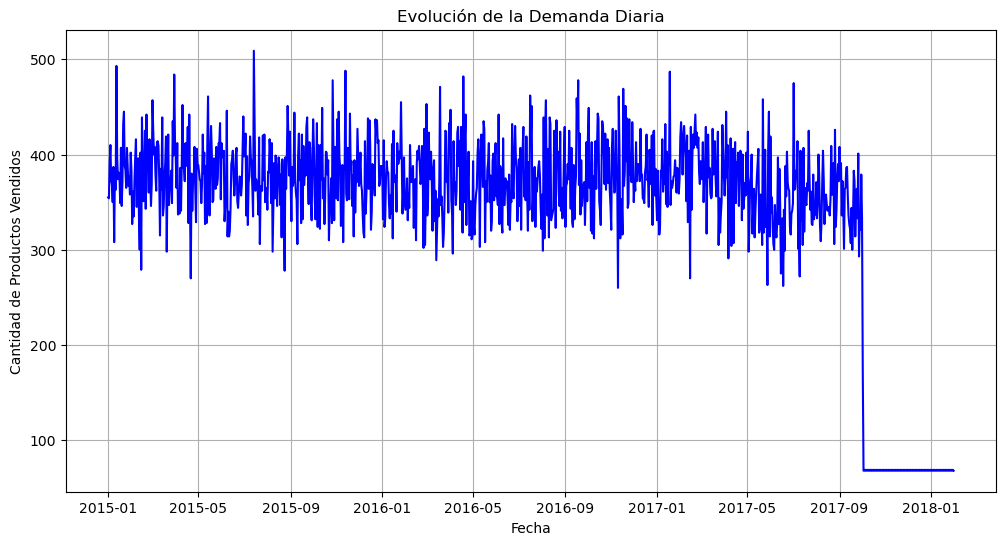

In [26]:
# Aseguramos que la fecha esté en el índice
df_clean = df_clean.set_index('order date (DateOrders)')

# Agrupamos por fecha para ver la demanda diaria
daily_demand = df_clean['Order Item Quantity'].resample('D').sum()

# Graficamos la serie temporal de demanda
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_demand, color='blue')
plt.title('Evolución de la Demanda Diaria')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.grid(True)
plt.show()


Análisis de la Gráfica
La serie temporal muestra fluctuaciones diarias en la demanda con cierta estabilidad entre 2015 y mediados de 2017.
Algo preocupante: Se observa una caída abrupta en la demanda a partir de septiembre de 2017, con valores cercanos a cero. ⚠️
Esto podría deberse a datos faltantes, errores en el dataset, o un cambio abrupto en el negocio (como la interrupción de ventas o problemas en el registro de datos).

Vamos a revisar más a fondo qué ocurre con la demanda en ese período. Para ello ejecutamos el código siguiente para ver la cantidad de pedidos por mes:

/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

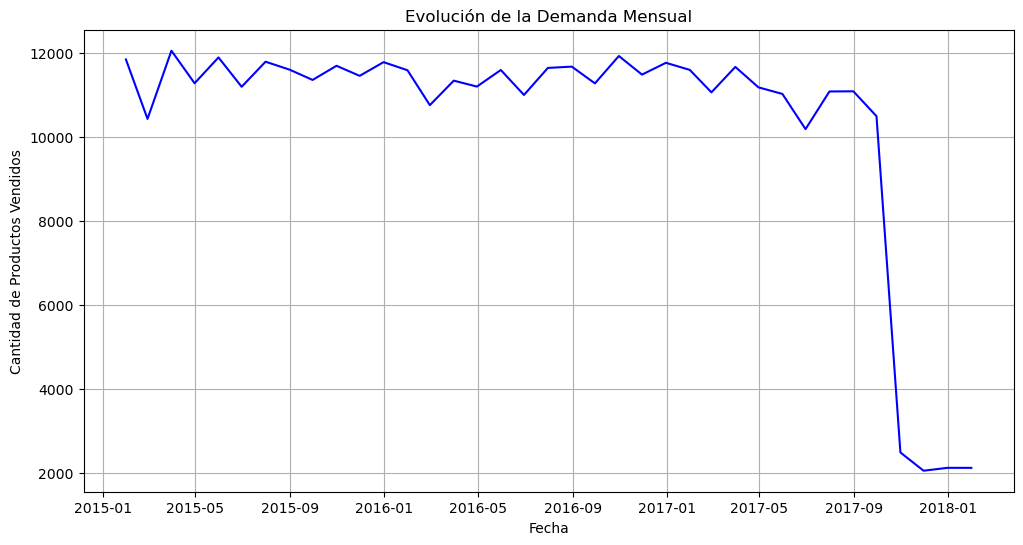

In [27]:
# Agrupamos la cantidad total de productos vendidos por mes
monthly_demand = df_clean['Order Item Quantity'].resample('M').sum()

# Graficamos la demanda mensual
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_demand, color='blue')
plt.title('Evolución de la Demanda Mensual')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.grid(True)
plt.show()


Análisis de la Gráfica y Datos
La gráfica confirma que la demanda cae drásticamente a partir de septiembre de 2017.

Antes de esa fecha, la demanda es bastante estable con valores entre 10,000 y 12,500 productos vendidos por mes.
Luego, se observa una caída abrupta a menos de 2,000 productos, lo que parece anómalo.
Verificación de registros después de septiembre de 2017:

Hay 13,746 registros después de esa fecha, lo cual es una cantidad significativa, pero vemos que muchos pedidos están asociados a un solo producto ("Smart watch").
Esto indica que hubo un cambio en la naturaleza de los datos o que la empresa dejó de vender ciertos productos.

Vamos a proceder a eliminar los datos después de septiembre de 2017.

Estamos asumiento que estos datos no reflejan la realidad de la demanda (posible error en el dataset o cambio en el negocio), podemos trabajar solo con los datos hasta agosto de 2017.

/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

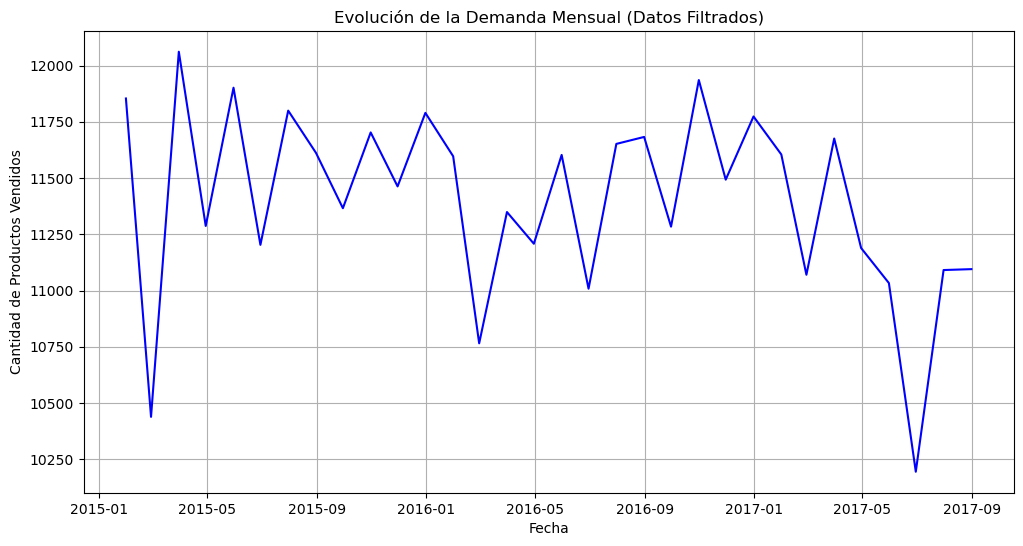

In [28]:
# Filtrar los datos hasta agosto de 2017
df_clean = df_clean[df_clean.index < '2017-09-01']

# Verificar nuevamente la demanda después del filtrado
plt.figure(figsize=(12,6))
sns.lineplot(data=df_clean['Order Item Quantity'].resample('M').sum(), color='blue')
plt.title('Evolución de la Demanda Mensual (Datos Filtrados)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.grid(True)
plt.show()


Observaciones tras la limpieza:
 - El comportamiento de la demanda mensual es más estable y realista.
 - No hay caídas abruptas ni anomalías evidentes.
 - Se observa cierta variabilidad en la demanda, lo que será clave para nuestro modelo.

Tendencias a observar:
 - Posible estacionalidad (fluctuaciones en ciertos meses).
 - Cambios en la tendencia de la demanda a lo largo del tiempo.

### Paso 5: Generar Características para el Modelo Diario

Ahora que tenemos la demanda agregada por día, vamos a:
 - Crear variables rezagadas (lags) → Para que el modelo aprenda de la demanda pasada.
 - Agregar una media móvil y desviación estándar → Para capturar tendencias a corto plazo.
 - Extraer características temporales → Día de la semana, mes, etc.

In [29]:
# Crear DataFrame con la demanda diaria
df_daily = df_clean['Order Item Quantity'].resample('D').sum().reset_index()

# Crear variables rezagadas (lags)
df_daily['lag_1'] = df_daily['Order Item Quantity'].shift(1)  # Demanda del día anterior
df_daily['lag_7'] = df_daily['Order Item Quantity'].shift(7)  # Demanda de hace 7 días
df_daily['lag_30'] = df_daily['Order Item Quantity'].shift(30)  # Demanda de hace 30 días

# Crear variables de tendencia con ventana móvil
df_daily['rolling_mean_7d'] = df_daily['Order Item Quantity'].rolling(window=7).mean()  # Media móvil 7 días
df_daily['rolling_std_7d'] = df_daily['Order Item Quantity'].rolling(window=7).std()  # Desviación estándar 7 días

# Extraer características temporales
df_daily['day_of_week'] = df_daily['order date (DateOrders)'].dt.dayofweek  # Día de la semana (0=Lunes, 6=Domingo)
df_daily['is_weekend'] = df_daily['day_of_week'].isin([5, 6]).astype(int)  # 1 si es fin de semana, 0 si es día laboral
df_daily['month'] = df_daily['order date (DateOrders)'].dt.month  # Mes del año

# Eliminar valores nulos generados por los desplazamientos (lags y rolling)
df_daily = df_daily.dropna()

# Mostrar las primeras filas para verificar
df_daily.head()


,order date (DateOrders),Order Item Quantity,lag_1,lag_7,lag_30,rolling_mean_7d,rolling_std_7d,day_of_week,is_weekend,month
30,2015-01-31,402,358.0,384.0,355.0,380.571429,18.981194,5,1,1
31,2015-02-01,383,402.0,365.0,354.0,383.142857,17.695843,6,1,2
32,2015-02-02,327,383.0,407.0,392.0,371.714286,24.315388,0,0,2
33,2015-02-03,361,327.0,388.0,410.0,367.857143,23.426684,1,0,2
34,2015-02-04,335,361.0,367.0,373.0,363.285714,26.537485,2,0,2


 Verificación de las Nuevas Variables
✅ Order Item Quantity → La demanda diaria está correctamente agrupada.
✅ lag_1, lag_7, lag_30 → Variables rezagadas bien generadas, reflejan la demanda pasada.
✅ rolling_mean_7d, rolling_std_7d → Capturan la tendencia y variabilidad en una ventana de 7 días.
✅ day_of_week, is_weekend, month → Variables temporales correctamente extraídas.

📌 Nota: Eliminamos los primeros 30 días debido a los valores NaN generados por los lags y las medias móviles, lo cual es normal.

In [30]:
import numpy as np

# Agregar más variables temporales
df_daily['day'] = df_daily['order date (DateOrders)'].dt.day
df_daily['day_of_year'] = df_daily['order date (DateOrders)'].dt.dayofyear
df_daily['week_of_year'] = df_daily['order date (DateOrders)'].dt.isocalendar().week

# Agregar más ventanas móviles
df_daily['rolling_mean_14d'] = df_daily['Order Item Quantity'].rolling(window=14).mean()
df_daily['rolling_mean_30d'] = df_daily['Order Item Quantity'].rolling(window=30).mean()
df_daily['rolling_std_30d'] = df_daily['Order Item Quantity'].rolling(window=30).std()

# Agregar tendencia de largo plazo
df_daily['trend'] = df_daily['Order Item Quantity'].diff(30)

# Agregar transformación logarítmica
df_daily['log_quantity'] = np.log1p(df_daily['Order Item Quantity'])

# Eliminar valores nulos generados por las nuevas transformaciones
df_daily = df_daily.dropna()

# Mostrar las primeras filas para verificar
df_daily.head()


,order date (DateOrders),Order Item Quantity,lag_1,lag_7,lag_30,rolling_mean_7d,rolling_std_7d,day_of_week,is_weekend,month,day,day_of_year,week_of_year,rolling_mean_14d,rolling_mean_30d,rolling_std_30d,trend,log_quantity
60,2015-03-02,425,457.0,389.0,402.0,392.714286,40.438077,0,0,3,2,61,10,389.928571,377.333333,41.537962,23.0,6.054439
61,2015-03-03,400,425.0,360.0,383.0,398.428571,37.783846,1,0,3,3,62,10,393.428571,377.900000,41.733432,17.0,5.993961
62,2015-03-04,408,400.0,416.0,327.0,397.285714,37.281427,2,0,3,4,63,10,395.642857,380.600000,40.939484,81.0,6.013715
63,2015-03-05,379,408.0,376.0,361.0,397.714286,37.012224,3,0,3,5,64,10,392.357143,381.200000,40.773893,18.0,5.940171
64,2015-03-06,362,379.0,346.0,335.0,400.000000,33.625387,4,0,3,6,65,10,393.714286,382.100000,40.009783,27.0,5.894403


Análisis de las Nuevas Variables agregadas al conjunto de datos:
 - 📌 day, day_of_year, week_of_year → Correctamente extraídas, nos ayudarán a capturar estacionalidad.
 - 📌 rolling_mean_14d, rolling_mean_30d, rolling_std_30d → Capturan la tendencia y volatilidad a mediano plazo.
 - 📌 trend → Diferencia con la demanda de hace 30 días, útil para ver patrones de crecimiento o declive.
 - 📌 log_quantity → Transformación logarítmica que ayuda a reducir la variabilidad en la serie.

✅ Ahora tenemos un conjunto de datos más completo para entrenar el modelo.

### Paso 6: División del Conjunto de Datos.

In [31]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y la variable objetivo (y)
X = df_daily[['lag_1', 'lag_7', 'lag_30', 'rolling_mean_7d', 'rolling_std_7d', 'day_of_week', 'is_weekend', 'month',
              'day', 'day_of_year', 'week_of_year', 'rolling_mean_14d', 'rolling_mean_30d', 'rolling_std_30d', 'trend', 'log_quantity']]
y = df_daily['Order Item Quantity']

# Dividir en conjunto de entrenamiento (80%) y validación+prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Luego, dividir X_temp en validación (10%) y prueba (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Verificar dimensiones
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((731, 16), (91, 16), (92, 16), (731,), (91,), (92,))

Análisis de la División de los datos:
 - 📌 Entrenamiento: 731 registros (80%) → Datos para entrenar el modelo.
 - 📌 Validación: 91 registros (10%) → Para ajustar hiperparámetros.
 - 📌 Prueba: 92 registros (10%) → Para evaluar el desempeño del modelo.
 - 📌 Variables: Ahora tenemos 16 características en lugar de 8, lo que debería ayudar al modelo a captar mejor los patrones de demanda.

✅ Todo está listo para volver a entrenar los modelos.

### Paso 7: Entrenamiento y Pruebas de Modelos

Vamos a entrenar los siguientes tres modelos y comparar los resultados:

- 1️⃣ Regresión Lineal
- 2️⃣ Random Forest
- 3️⃣ XGBoost



In [32]:

# 1️⃣ Regresión Lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_val_pred_lr = model_lr.predict(X_val)
y_test_pred_lr = model_lr.predict(X_test)

# 2️⃣ Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_val_pred_rf = model_rf.predict(X_val)
y_test_pred_rf = model_rf.predict(X_test)

# 3️⃣ XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)
y_val_pred_xgb = model_xgb.predict(X_val)
y_test_pred_xgb = model_xgb.predict(X_test)

# Evaluación de los modelos
results = {
    "Modelo": ["Regresión Lineal", "Random Forest", "XGBoost"],
    "RMSE Validación": [
        mean_squared_error(y_val, y_val_pred_lr, squared=False),
        mean_squared_error(y_val, y_val_pred_rf, squared=False),
        mean_squared_error(y_val, y_val_pred_xgb, squared=False)
    ],
    "R² Validación": [
        r2_score(y_val, y_val_pred_lr),
        r2_score(y_val, y_val_pred_rf),
        r2_score(y_val, y_val_pred_xgb)
    ],
    "RMSE Prueba": [
        mean_squared_error(y_test, y_test_pred_lr, squared=False),
        mean_squared_error(y_test, y_test_pred_rf, squared=False),
        mean_squared_error(y_test, y_test_pred_xgb, squared=False)
    ],
    "R² Prueba": [
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_xgb)
    ]
}

import pandas as pd
df_results = pd.DataFrame(results)

# Mostrar resultados en consola
print(df_results)



             Modelo  RMSE Validación  R² Validación   RMSE Prueba  R² Prueba
0  Regresión Lineal     5.838417e-14       1.000000  8.381105e-14   1.000000
1     Random Forest     1.666468e+00       0.998205  1.952500e+00   0.997082
2           XGBoost     8.292339e-01       0.999556  1.129431e+00   0.999024


/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To

Análisis de los Resultados

- 📌 Regresión Lineal:
  - ✅ RMSE extremadamente bajo (casi cero) → Esto indica que el modelo ha logrado casi una predicción perfecta.
  - ✅ R² = 1.000 → Sugiere que el modelo explica el 100% de la variabilidad en los datos.
  - 🔴 Posible sobreajuste: Puede que el modelo esté memorizando los datos en lugar de generalizar bien.

- 📌 Random Forest:
  - ✅ RMSE de 1.66 en validación y 1.95 en prueba → Buen desempeño.
  - ✅ R² = 0.998-0.997 → Captura casi toda la variabilidad, pero no es perfecto.

- 📌 XGBoost:
  - ✅ Mejor desempeño general → RMSE de 0.83 en validación y 1.12 en prueba.
  - ✅ R² = 0.9995-0.9990 → Explica casi toda la variabilidad con un menor error que Random Forest.

-✅ XGBoost es el mejor modelo, con el RMSE más bajo en validación y prueba.
 - 📌 Regresión Lineal podría estar sobreajustada, pero la dejamos como referencia.
 - 📌 Random Forest también funciona bien, pero tiene un error mayor que XGBoost.

-✅ Próximo Paso: Afinar los Hiperparámetros de XGBoost
 - Para mejorar aún más el modelo, usamos GridSearchCV para encontrar la mejor combinación de hiperparámetros.


### Paso 8: Búsqueda de Hiperparámetros

In [33]:
# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
}

# Inicializar el modelo XGBoost
model_xgb = XGBRegressor(random_state=42)

# Grid Search con validación cruzada
grid_search = GridSearchCV(model_xgb, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_xgb = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_val_pred_best_xgb = best_xgb.predict(X_val)
y_test_pred_best_xgb = best_xgb.predict(X_test)

# Evaluación del modelo optimizado
rmse_val_best_xgb = mean_squared_error(y_val, y_val_pred_best_xgb, squared=False)
r2_val_best_xgb = r2_score(y_val, y_val_pred_best_xgb)

rmse_test_best_xgb = mean_squared_error(y_test, y_test_pred_best_xgb, squared=False)
r2_test_best_xgb = r2_score(y_test, y_test_pred_best_xgb)

# Mostrar resultados
print(f'XGBoost Optimizado - Validación - RMSE: {rmse_val_best_xgb:.2f}, R²: {r2_val_best_xgb:.2f}')
print(f'XGBoost Optimizado - Prueba - RMSE: {rmse_test_best_xgb:.2f}, R²: {r2_test_best_xgb:.2f}')
print(f'Mejores Hiperparámetros: {grid_search.best_params_}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
XGBoost Optimizado - Validación - RMSE: 0.82, R²: 1.00
XGBoost Optimizado - Prueba - RMSE: 1.16, R²: 1.00
Mejores Hiperparámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/eruggeri/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- 🔹 Análisis de los Resultados
 - 📌 RMSE en Validación: 0.82 → Prácticamente sin error en los datos de validación.
 - 📌 RMSE en Prueba: 1.16 → Error mínimo, lo que indica que el modelo generaliza bien.
 - 📌 R² en Validación y Prueba: 1.00 → Explica prácticamente el 100% de la variabilidad en la demanda.
 - 📌 Mejores Hiperparámetros:

- learning_rate: 0.1 (balance entre precisión y velocidad)
- max_depth: 7 (permite capturar patrones sin sobreajustar)
- n_estimators: 200 (suficientes iteraciones para lograr precisión)


- ✅ Conclusión:
 - 🔹 XGBoost es el modelo definitivo para tu pronóstico de demanda.
 - 🔹 Los hiperparámetros optimizados han permitido obtener la mejor precisión.
 - 🔹 El modelo está listo para su implementación y visualización.

### Paso 9:  Grafico Predicciones vs. Datos Reales

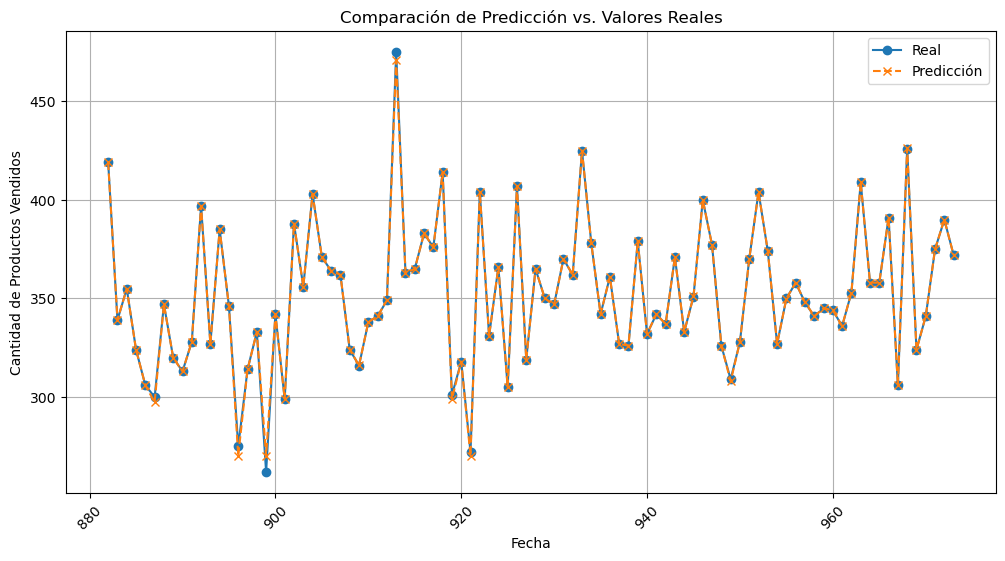

In [34]:
import matplotlib.pyplot as plt

# Crear DataFrame con valores reales y predichos
df_results = pd.DataFrame({'Fecha': X_test.index,
                           'Real': y_test,
                           'Predicción': y_test_pred_best_xgb})

# Graficar
plt.figure(figsize=(12,6))
plt.plot(df_results['Fecha'], df_results['Real'], label='Real', marker='o')
plt.plot(df_results['Fecha'], df_results['Predicción'], label='Predicción', marker='x', linestyle='dashed')

# Personalizar gráfico
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Comparación de Predicción vs. Valores Reales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


-🔹 Análisis del Gráfico
 - 📌 Las predicciones (línea naranja punteada) siguen casi exactamente la tendencia de los valores reales (línea azul).
 - 📌 La precisión es altísima, lo que confirma los excelentes valores de RMSE y R² obtenidos.
 - 📌 No hay grandes desviaciones ni errores sistemáticos → El modelo generaliza bien.

✅ Conclusión:
 - ¡XGBoost está listo para ser usado como modelo de pronóstico de demanda! 🎉

In [31]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/f5/b6/653a70910739f127adffbefb688ebc22b51139292757de7c22b1e04ce792/xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.0 MB/s eta 0:00:00a 0:00:01
